In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv("cleaned_data.csv")
df.head()

,District Name,Year,Date,Time of Day,Number of vehicles involved,Number of Casualties,Accident_Classification,Accident_Spot,Urban / Rural,Accident Location,Cause,Accident Severity,Junction Control,Road_Character,Road_Type,Surface_Type,Surface_Condition,Road_Condition,Weather Condition,Lane_Type
0,Tumakuru,2016,24-01-2016,Afternoon,2,10,Road Accidents,Bridge,Urban,Narrow Bridge Or Culverts,Human Error,Fatal,Controlled,Others,Highways & Expressways,Bitumen(Tar),Dry,No Influence On Accident,Clear,Singlelane
1,Hassan,2016,02-09-2016,Night,1,10,Road Accidents,Other,Rural,At Pedestrian Crossing,Human Error,Fatal,Uncontrolled,Straight And Flat,Highways & Expressways,Bitumen(Tar),Dry,No Influence On Accident,Clear,Duallane
2,Bengaluru Dist,2019,27-11-2019,Night,1,10,Road Accidents,Junction,Urban,Near School Or College,Human Error,Fatal,Controlled,Straight And Flat,Highways & Expressways,Concrete,Dry,Construction Work / Material,Clear,Others
3,Chitradurga,2017,12-09-2017,Night,1,9,Road Accidents,Other,Urban,Open Area,Human Error,Fatal,Uncontrolled,Others,Highways & Expressways,Bitumen(Tar),Dry,No Influence On Accident,Clear,Others
4,Raichur,2017,12-07-2017,Evening,2,8,Road Accidents,Other,Urban,Near Petrol Pump,Human Error,Fatal,Uncontrolled,Others,Urban Roads,Bitumen(Tar),Wet,Pot Holed,Clear,Others


C:\Users\Soumashree\AppData\Local\Temp\ipykernel_23220\2195588692.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_casualties.values, y=weather_casualties.index, palette='coolwarm')


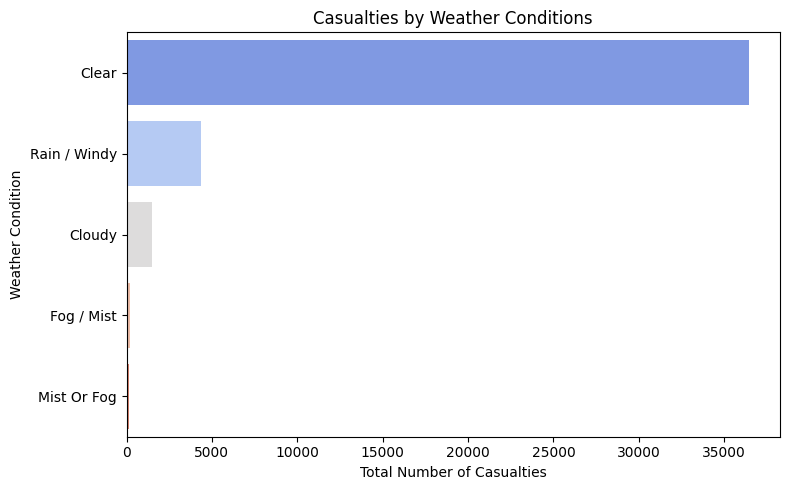

In [8]:
weather_casualties = data_cleaned.groupby('Weather Condition')['Number of Casualties'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=weather_casualties.values, y=weather_casualties.index, palette='coolwarm')
plt.title('Casualties by Weather Conditions')
plt.xlabel('Total Number of Casualties')
plt.ylabel('Weather Condition')
plt.tight_layout()
plt.show()

C:\Users\Soumashree\AppData\Local\Temp\ipykernel_23220\328094374.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lane_type_counts.values, y=lane_type_counts.index, palette='rocket')


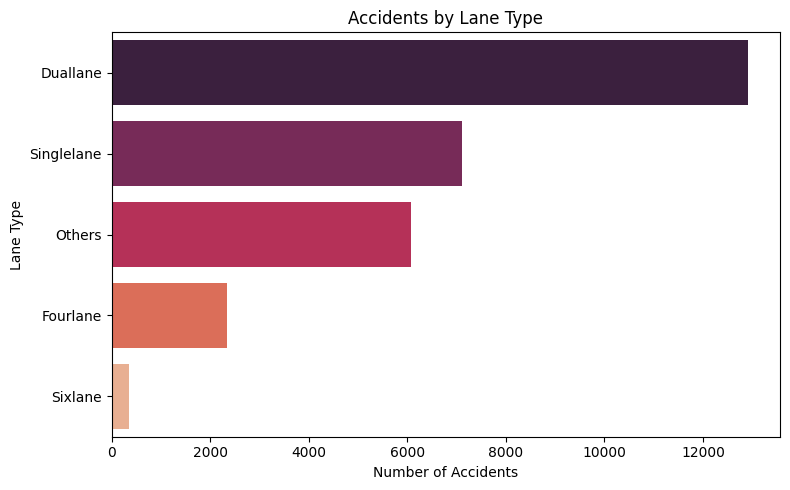

In [9]:
lane_type_counts = data_cleaned['Lane_Type'].value_counts()

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=lane_type_counts.values, y=lane_type_counts.index, palette='rocket')
plt.title('Accidents by Lane Type')
plt.xlabel('Number of Accidents')
plt.ylabel('Lane Type')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

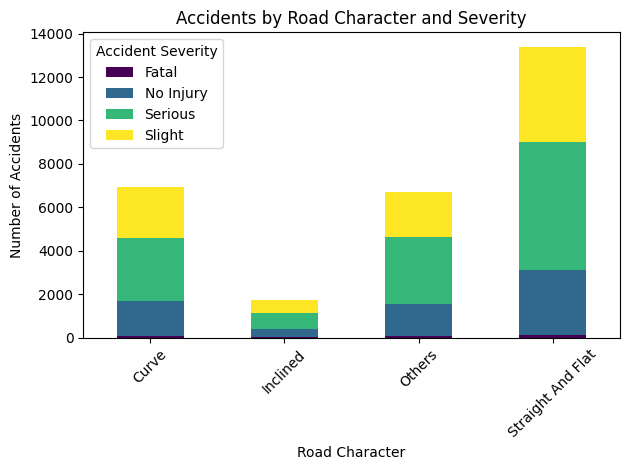

In [10]:
road_char_severity = data_cleaned.groupby(['Road_Character', 'Accident Severity']).size().unstack().fillna(0)

# Plot
plt.figure(figsize=(10,6))
road_char_severity.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Accidents by Road Character and Severity')
plt.xlabel('Road Character')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Soumashree\AppData\Local\Temp\ipykernel_23220\754209758.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=surface_type_counts.values, y=surface_type_counts.index, palette='Blues_d')


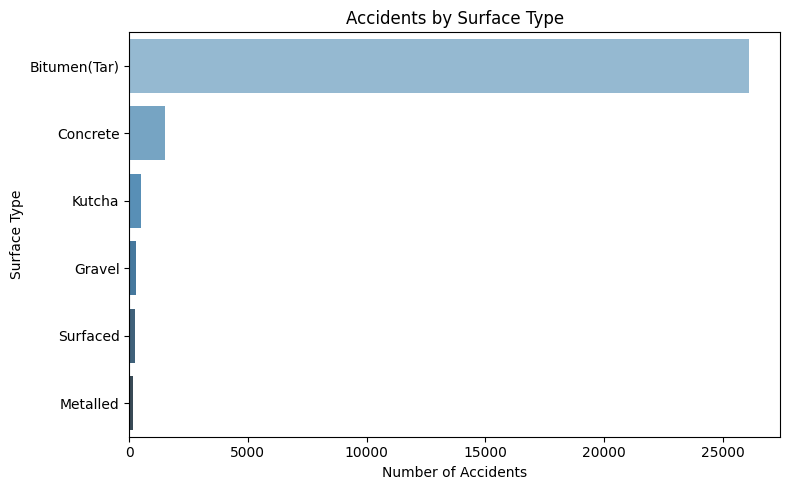

In [11]:
surface_type_counts = data_cleaned['Surface_Type'].value_counts()

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=surface_type_counts.values, y=surface_type_counts.index, palette='Blues_d')
plt.title('Accidents by Surface Type')
plt.xlabel('Number of Accidents')
plt.ylabel('Surface Type')
plt.tight_layout()
plt.show()

C:\Users\Soumashree\AppData\Local\Temp\ipykernel_23220\3910752357.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_causes.values, y=top_causes.index, palette='Reds_r')


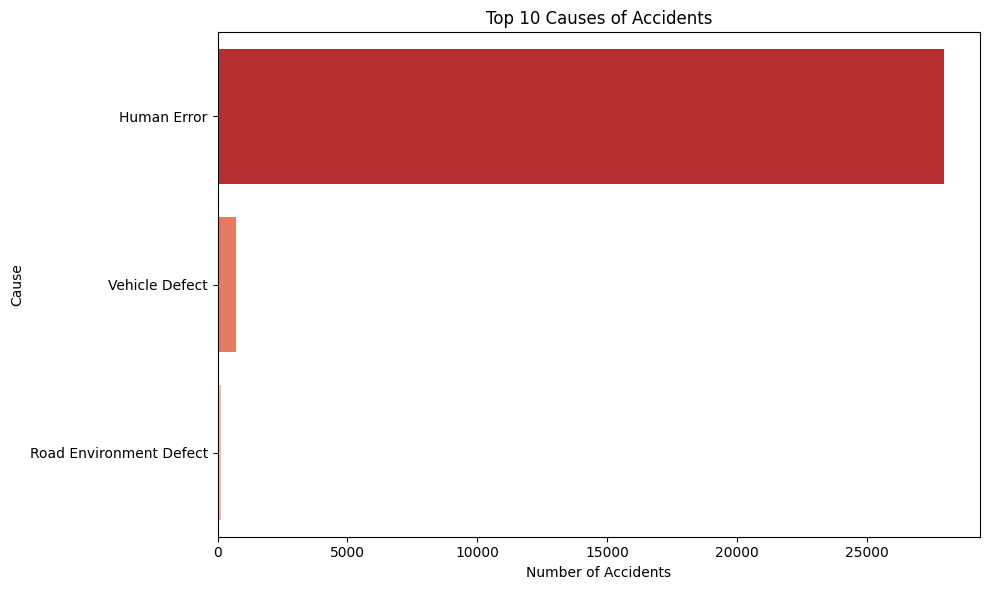

In [12]:
top_causes = data_cleaned['Cause'].value_counts().head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_causes.values, y=top_causes.index, palette='Reds_r')
plt.title('Top 10 Causes of Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Cause')
plt.tight_layout()
plt.show()

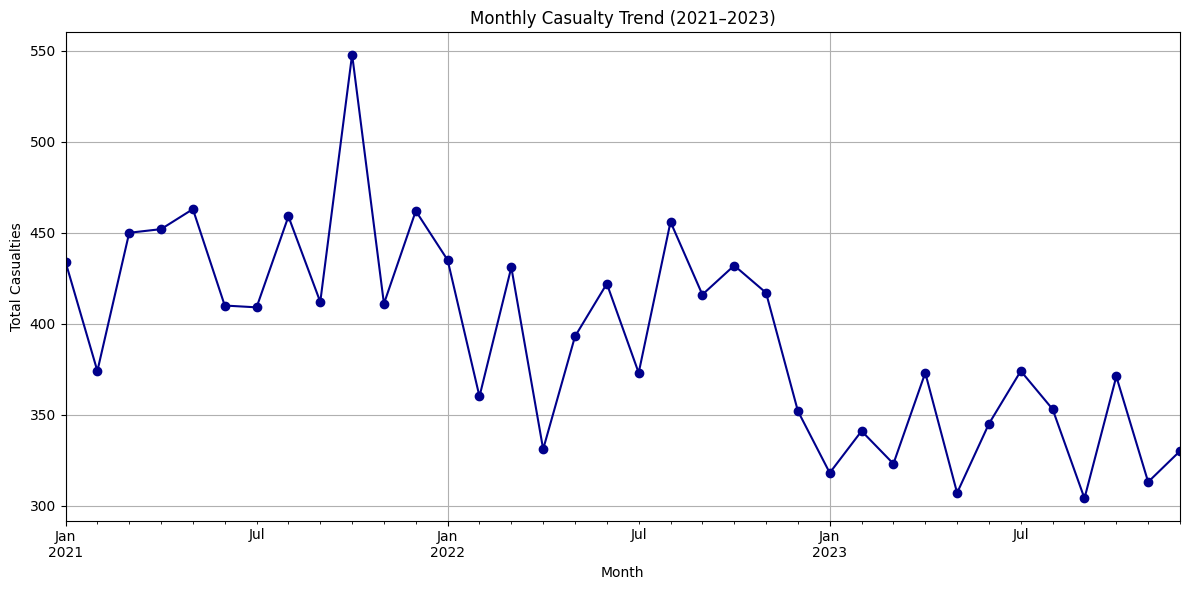

In [13]:
monthly_df = data_cleaned[data_cleaned['Year'].isin([2021, 2022, 2023])]

# Group by Year and Month
monthly_casualty = monthly_df.groupby([monthly_df['Date'].dt.to_period('M')])['Number of Casualties'].sum()
monthly_casualty.index = monthly_casualty.index.to_timestamp()

# Plot
plt.figure(figsize=(12,6))
monthly_casualty.plot(marker='o', color='darkblue')
plt.title('Monthly Casualty Trend (2021–2023)')
plt.xlabel('Month')
plt.ylabel('Total Casualties')
plt.grid(True)
plt.tight_layout()
plt.show()

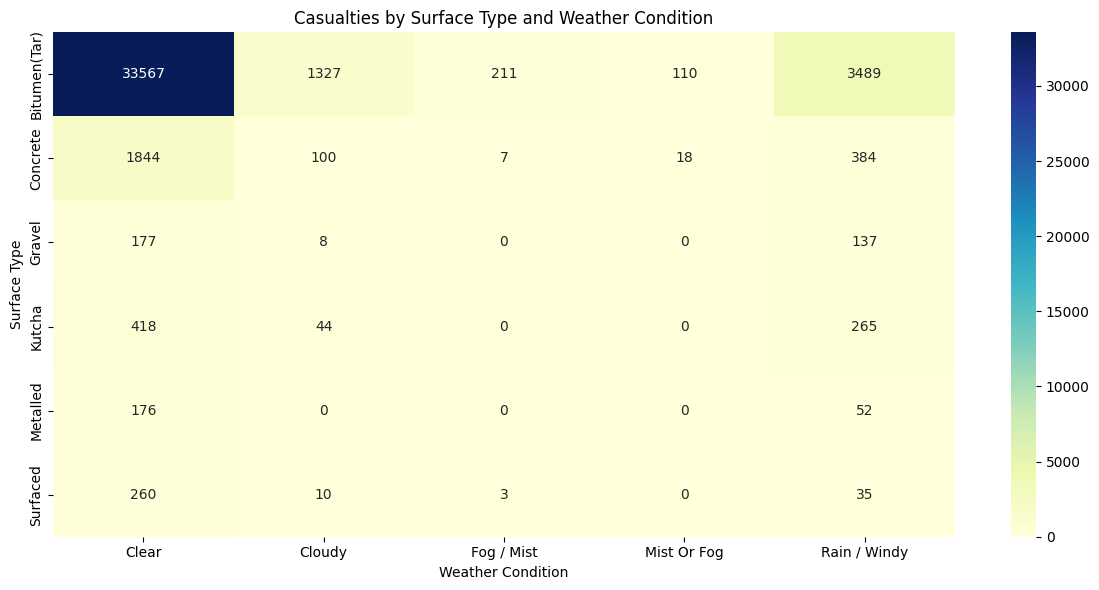

In [14]:
combo_group = data_cleaned.groupby(['Surface_Type', 'Surface_Condition', 'Weather Condition'])['Number of Casualties'].sum().reset_index()

# Plot using heatmap-style pivot table (optional advanced view)
pivot_table = combo_group.pivot_table(index='Surface_Type', columns='Weather Condition', values='Number of Casualties', aggfunc='sum').fillna(0)

plt.figure(figsize=(12,6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Casualties by Surface Type and Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Surface Type')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

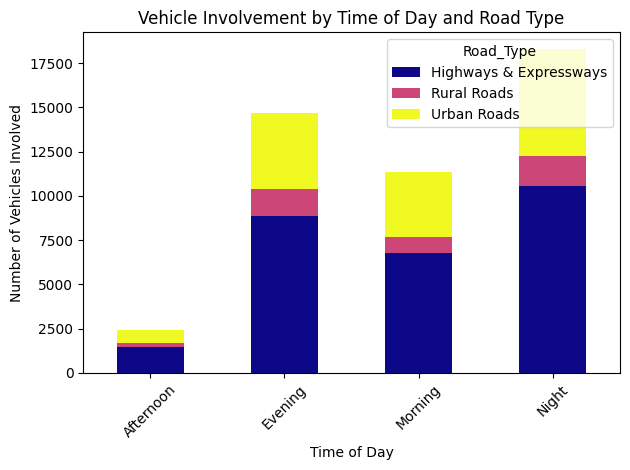

In [15]:
vehicle_involvement = data_cleaned.groupby(['Time of Day', 'Road_Type'])['Number of vehicles involved'].sum().unstack().fillna(0)

# Plot
plt.figure(figsize=(10,6))
vehicle_involvement.plot(kind='bar', stacked=True, colormap='plasma')
plt.title('Vehicle Involvement by Time of Day and Road Type')
plt.xlabel('Time of Day')
plt.ylabel('Number of Vehicles Involved')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

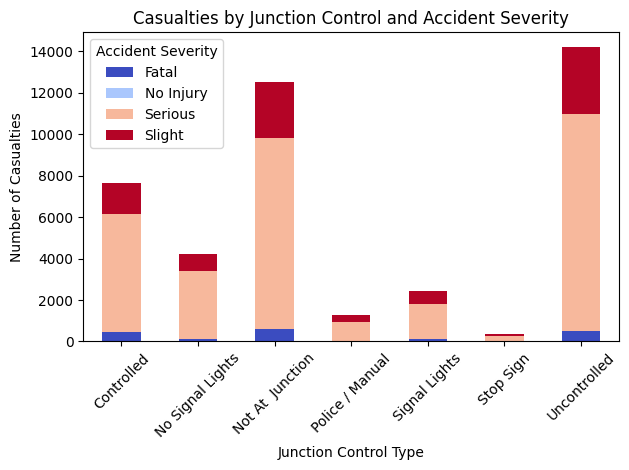

In [16]:
junction_severity = data_cleaned.groupby(['Junction Control', 'Accident Severity'])['Number of Casualties'].sum().unstack().fillna(0)

# Plot
plt.figure(figsize=(10,6))
junction_severity.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Casualties by Junction Control and Accident Severity')
plt.xlabel('Junction Control Type')
plt.ylabel('Number of Casualties')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()